# День 01 — Дескриптивный и разведочный анализ данных

Пришло время познакомиться с данными получше. Когда начинаешь дескриптивный и разведочный анализ, никогда не знаешь, что найдешь. И найдешь ли что-то интересное вообще? Посмотрим, удастся ли нам найти какие-то любопытные инсайты на этом этапе анализа данных.

Для начала импортируй библиотеки, которые понадобятся нам в работе.

In [ ]:
# Это не нужно, т.к. данные берем из каггла

# # пытаемся подключить гугл-диск, если рабоатем с колаба
# try:
#     from google.colab import drive
#     drive.mount('/content/drive')
# except:
#     pass

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Если ячейка выше **не запускается**, то, скорее всего, **не установлена какая-либо библиотека**. **Чтобы установить библиотеку, напиши**:
`pip install matplotlib` или `pip install seaborn` или `pip install pandas`

## Загрузка данных

Сегодня мы проведем дескриптивный анализ наших данных. Прежде чем приступать к дескриптивному анализу, необходимо понять, с какими данными мы имеем дело, и заблаговременно принять меры по их изменению или доработке.

Загрузим наши данные

In [2]:
import os
import gc
from glob import glob
from pathlib import Path

# Путь к каталогу с датасетами
path_to_dataset = './datasets'

In [3]:
# Установка библиотеки Kaggle
# !pip install kaggle

if not Path(path_to_dataset).is_dir():
    # Загрузка датасета
    !kaggle datasets download -d saspav/21-school

    # Распаковка загруженного файла
    !unzip 21-school.zip -d datasets

In [13]:
%%time
# dataset_01_06 = pd.read_csv("путь к файлу dataset_01_06.csv")
# dataset_07_12 = pd.read_csv("путь к файлу dataset_07_12.csv")
dataset_01_06 = pd.read_csv(os.path.join(path_to_dataset, 'dataset_01_06.csv'))
dataset_07_12 = pd.read_csv(os.path.join(path_to_dataset, 'dataset_07_12.csv'))

Wall time: 52.3 s


Атрибут `.shape` выведет разметы датасета: (Количество строк, Количество столбцов).

In [14]:
dataset_01_06.shape

(32092, 3648)

In [15]:
dataset_07_12.shape

(34661, 3648)

## Добавление нового признака

Для удобства проведения EDA давай объединим 2 датасета, но перед эти добавим признак `period`.

In [16]:
dataset_01_06["period"] = "1 полугодие"
dataset_07_12["period"] = "2 полугодие"

In [17]:
dataset_01_06["period"].head(5)

0    1 полугодие
1    1 полугодие
2    1 полугодие
3    1 полугодие
4    1 полугодие
Name: period, dtype: object

## Задание 1

Объедини датасеты `dataset_01_06` и `dataset_07_12` в один под названием `dataset`. 

Выведи размеры получившегося датасета.

In [19]:
%%time
dataset = pd.concat([dataset_01_06, dataset_07_12], ignore_index=True)
dataset.shape

Wall time: 3.73 s


(66753, 3649)

## Сбросить индекс

Так как ты объединил 2 датасета, у нас могут дублироваться индексы строк. Поэтому для удобства воспользуемся методом `reset_index` для того, чтобы спросить индексы строк.

In [20]:
# не будем этого делать, т.к. индексы были перестроены при объединении датасетов
# dataset = dataset.reset_index()

In [21]:
# очистим память от неиспользуемых переменных
dataset_01_06 = dataset_07_12 = None
gc.collect()

30

## Фильтрация

Так как у нас данные за два полугодия, в нашем датасете могут оказаться данные по одному и тому же пользователю. Например, выберем пользователя с `id` 34657. Для этого отфильруем данные с помощью следующей конструкции:

`dataset['условие по выбору строк']`

In [22]:
# Выберем из датасета только те строки, которые удовлетволяют условию client_id = 34657
dataset[dataset["client_id"] == 34657] 

,prepay_ind_p1m,latitude_1m,building_type_key_1m,deferred_pay_1m,pay_count_p3m,crm_init_count_d1m,crm_out_count_p3m,prepay_ind_d2m,basic_day_debt_bad_max_d1m,bad_debt_p1m,...,is_multiscreen_p1m,avg_view_other_p1m,count_purchase_1m,avg_view_multi_1m,total_duration_1m,avg_view_adult_1m,avg_view_category_18_d3m,avg_view_tvmarket_p2m,avg_view_category_0_2m,period
30289,0.0,51.704804,377945938.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.18,674.43,0.0,0.0,0.0,0.0,1 полугодие


## Задание 2

Пока у нас нет задачи изучить наших клиентов «в динамике», мы просто хотим описать нашего клиента.

Давай создадим переменную `dataset_unique`. В нее сохраним **последние** данные об **уникальных** клиентах. 
В этом тебе поможет метод [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) 
и его параметр `keep`.

Выведи количество строк получившегося датасета. Чтобы убедиться, что ты все выполнил верно, 
выполни код `assert len(dataset_unique) == 60699`. Он должен выполниться без ошибок.

In [23]:
%%time
dataset_unique = dataset.drop_duplicates("client_id", keep='last')

Wall time: 1.46 s


In [24]:
assert len(dataset_unique) == 60699

## Подсчет количества значений

Чтобы подсчитать **количество значений у признака**: 
Сначала в квадратных скобочках выбери признак, который тебя интересует. Например, `['gender_1m']` — признак пола клиента. А затем воспользуйся методом `.value_counts()`.

In [25]:
dataset_unique['gender_1m'].value_counts()

2.0    30924
1.0    27447
0.0       42
Name: gender_1m, dtype: int64

В файле `attributes.xlsx` сказано:
> 0 - Неизвестно, 1 -
> Мужской, 2 - Женский

## Отрисовка графиков

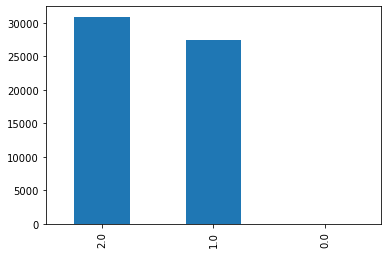

In [26]:
dataset_unique['gender_1m'].value_counts().plot.bar();

**Чтобы нарисовать график**, используй метод `.plot` и соответствующее название графика. Чтобы отрисовать стобцовую диаграмму, допиши `.bar()`

## Задание 3

Построй круговую диаграмму [pie-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html) 
по количеству ушедших клиентов. За отток клиента отвечает признак `label`.

Чтобы красиво дополнить график, добавь эти аргументы `autopct='%1.1f%%', legend=True, title='Ушедшие 
пользователи', ylabel=''`, в метод `pie()`. 

Какой процент пользователей отказался от наших услуг?

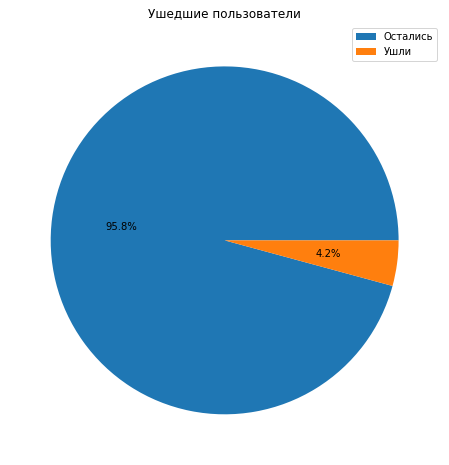

In [38]:
plt.figure(figsize=(8, 8))
dataset_unique['label'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                legend=True, 
                                                labels=None,
                                                title='Ушедшие пользователи', 
                                                ylabel='')
plt.legend(['Остались', 'Ушли'])
plt.show()

In [50]:
prs = dataset_unique['label'].value_counts(normalize=True)[1]
print(f"От наших услуг отказались: {prs:.1%} пользователей")

От наших услуг отказались: 4.2% пользователей


## Задание 4

Первая гипотеза, которую все хотят проверить — если клиент часто обращается в поддержку, 
то ему что-то не нравится, и, возможно, он собирается отказаться от наших услуг (хотя на самом деле, часто все наоборот). 

C помощью функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) построй график «ящик с усами» 
по количеству обращений клиента **за 3 месяца** по ушедшим и оставшимся клиентам. В этом тебе поможет аргумент `hue`.

Отличается ли медиана количества обращений у ушедших и оставшихся клиентов?

# Задание 5

У нас имеются данные баланса клиента. Данные баланса клиента **за 3 месяца** собраны в колонке `balance_sum_3m`. 
Интересно посмотреть, сколько в среднем клиенты держат на счетах. 

C помощью функции диаграмму [hist-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html) 
построй гистограмму баланса пользователей. Для функции `hist` используй аргумент `bins=200`. 

Также рассчитай среднее и медиану для колонки `balance_sum_3m`. Сохрани их в переменные `mean` и `median`. 
С помощью функции `plt.axvline` добавь эти статистики на гистограмму.

In [65]:
mean = dataset_unique['balance_sum_3m'].mean().round(2)
mean

3061.4

In [67]:
median = dataset_unique['balance_sum_3m'].median()
median

2323.45

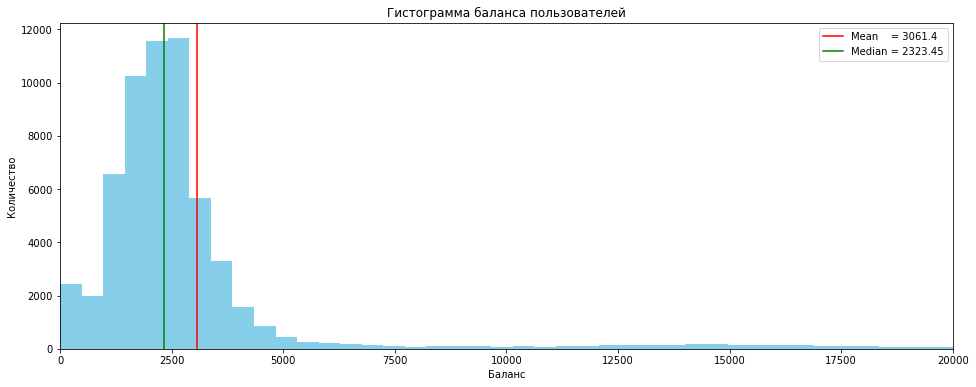

In [77]:
plt.figure(figsize=(16, 6))
plt.hist(dataset_unique['balance_sum_3m'], bins=200, color='skyblue')
plt.title('Гистограмма баланса пользователей')
plt.xlabel('Баланс')
plt.ylabel('Количество')

plt.axvline(x=mean, color='r', label=f'Mean    = {mean}')
plt.axvline(x=median, color='g', label=f'Median = {median}')
plt.xlim([0, 20000]) # Ограничение оси Х от 0 до 20.000
plt.legend();

## Сводная таблица

Теперь было бы интересно посмотреть изменение количества ушедших/оставшихся пользователей. В этом нам помогут сводные таблицы.
Воспользуемся функцией `pd.pivot_table`.

In [51]:
table = pd.pivot_table(
    dataset,  # Указываем нашу таблицу
    values='client_id',  # Указываем значение, по которому будем осуществлять сводку. (уникальный id клиента)
    index='period', # Индекс таблицы
    columns='label',  # Колонки таблицы
    aggfunc='count' # Какую функцию будет применять к values.
)

In [52]:
table

label,0,1
period,,
1 полугодие,30950,1142
2 полугодие,33235,1426


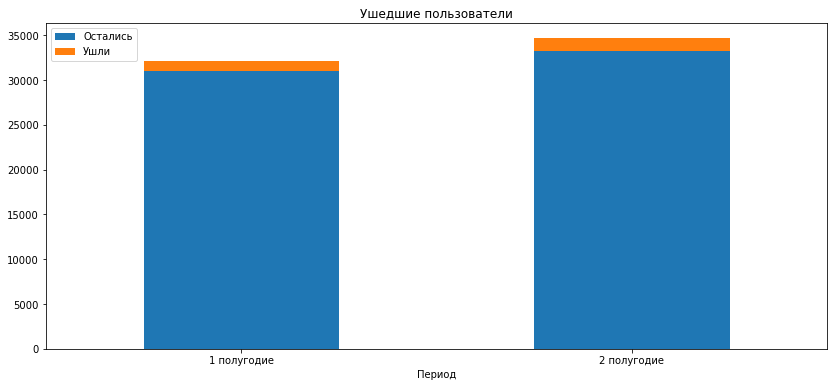

In [75]:
fig, ax = plt.subplots(figsize=(14, 6))
table.plot.bar(legend=True, title='Ушедшие пользователи', stacked=True, ax=ax)
plt.legend(['Остались', 'Ушли'], loc='upper left')
# Установка горизонтальных надписей для оси x
plt.xticks(range(len(table.index)), table.index, rotation=0)
# Добавление заголовка оси X
plt.xlabel('Период')
plt.show()

## Задание 6

А какую статистику о клиенте хотел бы про визуализировать ты? Надеемся, что за предыдущие задания у тебя уже появились 
гипотезы, которые бы ты хотел визуализировать.

Используй инструменты, с которыми ты познакомился ранее, и визуализируй статистики, интересные лично тебе. 
Чем больше, тем лучше. :)


In [ ]:
# Код тут

## Задание 7

Используя библиотеку [Plotly и функции Density Heatmap](https://plotly.com/python/mapbox-density-heatmaps/), отрисуй тепловую карту клиентов. 
За маркер используй **время жизни клиента**.

In [ ]:
# Код тут